About this file

Suggest Edits
synthetic hotel booking records generated to simulate real-world reservation behavior across multiple Indian cities.
The dataset includes booking lead times, guest counts, room assignments, cancellations, meal plans, customer type, and reservation status.

It is designed for hotel booking prediction models, cancellation analysis, seasonality trends, customer segmentation, and machine learning research.
All data is fully artificial, created through statistical simulation—no real guests, hotels, or booking systems are used.

The file is standardized, cleaned, and suitable for EDA, ML pipelines, and forecasting tasks.

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




In [37]:
data = pd.read_csv('/content/hotel_bookings_updated_2024.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2024.0,26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.0,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2024.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2024.0,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2024.0,26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2024.0,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2024.0,52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [39]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [41]:
count_of_9_in_agent = data[data['agent'] == 9].shape[0]
print(f"There are {count_of_9_in_agent} occurrences of '9' in the 'agent' field.")

There are 31961 occurrences of '9' in the 'agent' field.


In [42]:
canceled_counts = data['is_canceled'].value_counts()
canceled_proportions = data['is_canceled'].value_counts(normalize=True)

print("Distribution of 'is_canceled' (Counts):")
print(canceled_counts)
print("\nDistribution of 'is_canceled' (Proportions):")
print(canceled_proportions)

Distribution of 'is_canceled' (Counts):
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Distribution of 'is_canceled' (Proportions):
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


The `is_canceled` column represents whether a booking was canceled (1) or not (0). The output above shows the number of bookings that were canceled versus not canceled, along with their respective proportions of the total bookings.

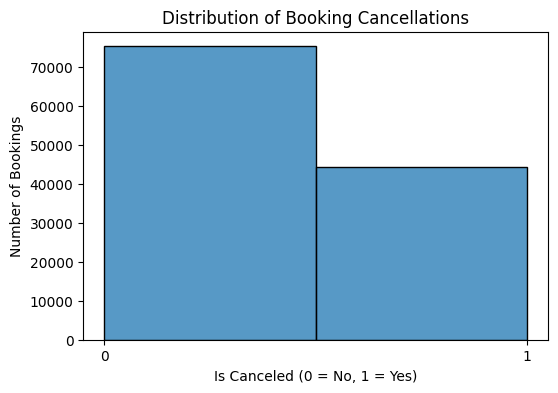

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(data['is_canceled'], bins=2, kde=False)
plt.title('Distribution of Booking Cancellations')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1])
plt.show()

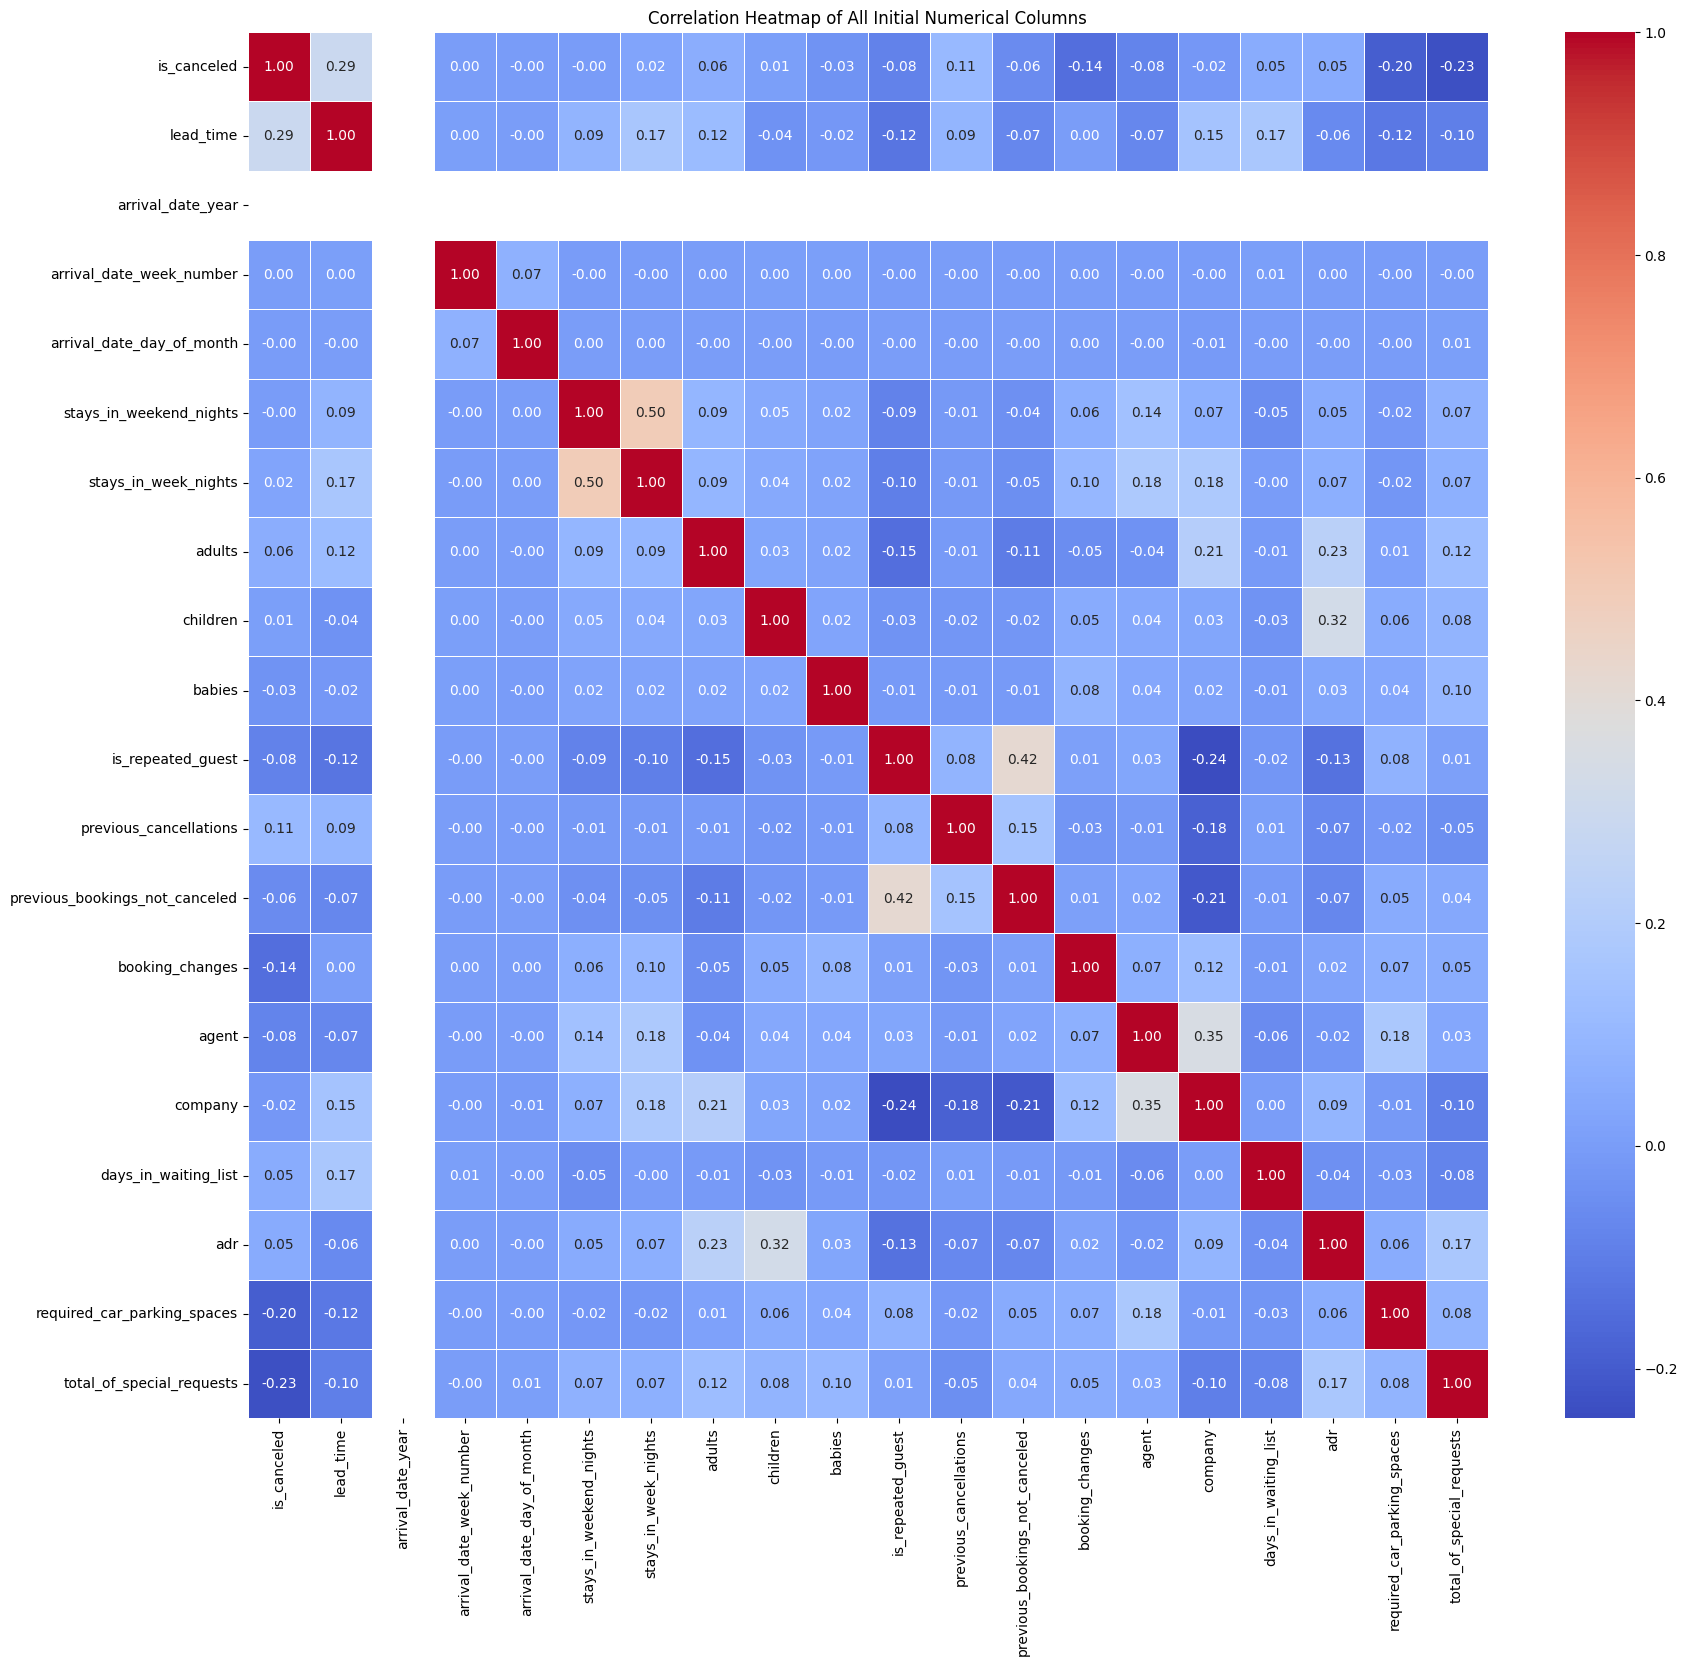

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the original data to get all initial columns
initial_data = pd.read_csv('/content/hotel_bookings_updated_2024.csv')

# Select only numerical columns from the initial data
numerical_cols_initial = initial_data.select_dtypes(include=np.number)

# Calculate the correlation matrix for these numerical columns
correlation_matrix_initial = numerical_cols_initial.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_initial, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Initial Numerical Columns')
plt.show()

In [48]:
columns_to_drop = [
    'arrival_date_year',
    'arrival_date_month',
    'hotel',
    'arrival_date_day_of_month',
    'company',
    'reservation_status',
    'reservation_status_date'
]
data.drop(columns=columns_to_drop, inplace=True)

In [49]:

# Split features and target
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']


In [50]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Prpearing for logistic regression model

In [63]:
# Re-split X and y to get the unimputed, unscaled train/test sets
# This overwrites the previous X_train, X_test, y_train, y_test variables
X_train_impute, X_test_impute, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the mode of 'agent' from the training set only
# .mode() returns a Series, so [0] gets the actual mode value
agent_mode = X_train_impute['agent'].mode()[0]

# Impute missing values in 'agent' column in both train and test sets
X_train_impute['agent'].fillna(agent_mode, inplace=True)
X_test_impute['agent'].fillna(agent_mode, inplace=True)

# Impute missing values in 'children' column with the median from the training set
children_median = X_train_impute['children'].median()
X_train_impute['children'].fillna(children_median, inplace=True)
X_test_impute['children'].fillna(children_median, inplace=True)

# VERIFICATION STEP: Check for NaNs after agent/children imputation
print(f"\nTotal NaNs in X_train_impute after agent/children imputation: {X_train_impute.isnull().sum().sum()}")
print(f"Total NaNs in X_test_impute after agent/children imputation: {X_test_impute.isnull().sum().sum()}")

numeric_cols = X_train_impute.select_dtypes(include=np.number).columns
categorical_cols = X_train_impute.select_dtypes(include='object').columns

# Initialize StandardScaler (re-initialize to ensure it's fresh for the imputed data)
scaler = StandardScaler()

# Fit the scaler on the numeric columns of X_train_impute and transform
X_train_scaled_numeric = scaler.fit_transform(X_train_impute[numeric_cols])
X_test_scaled_numeric = scaler.transform(X_test_impute[numeric_cols])

# Create DataFrames from scaled numeric arrays
X_train = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train_impute.index)
X_test = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols, index=X_test_impute.index)

# Concatenate scaled numeric and original categorical columns to form the final X_train and X_test
X_train = pd.concat([X_train, X_train_impute[categorical_cols]], axis=1)
X_test = pd.concat([X_test, X_test_impute[categorical_cols]], axis=1)

print("X_train head after imputation and re-scaling:")
print(X_train.head())
print("\nX_test head after imputation and re-scaling:")
print(X_test.head())

# Verify no more NaNs in 'agent' and 'children' column
print(f"\nNaNs in X_train['agent'] after imputation: {X_train['agent'].isnull().sum()}")
print(f"NaNs in X_test['agent'] after imputation: {X_test['agent'].isnull().sum()}")
print(f"NaNs in X_train['children'] after imputation: {X_train['children'].isnull().sum()}")
print(f"NaNs in X_test['children'] after imputation: {X_test['children'].isnull().sum()}")


Total NaNs in X_train_impute after agent/children imputation: 374
Total NaNs in X_test_impute after agent/children imputation: 114
X_train head after imputation and re-scaling:
        lead_time  arrival_date_week_number  ...  customer_type        city
67702   -0.373594                 -0.756697  ...      Transient     Kolkata
115851  -0.654357                 -1.155789  ...      Transient   Bangalore
57345   -0.897685                 -1.355336  ...      Transient      Bhopal
11622    1.376493                  1.504828  ...      Transient  Chandigarh
33333   -0.757303                  1.039220  ...      Transient      Indore

[5 rows x 25 columns]

X_test head after imputation and re-scaling:
        lead_time  arrival_date_week_number  ...    customer_type       city
30946    0.927273                  1.438313  ...        Transient        Goa
40207   -0.205137                 -1.089274  ...        Transient  Hyderabad
103708  -0.738586                  0.773158  ...  Transient-Party 

/tmp/ipython-input-2320409529.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_impute['agent'].fillna(agent_mode, inplace=True)
/tmp/ipython-input-2320409529.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [52]:
data['city'].unique()

array(['Chandigarh', 'Mumbai', 'Delhi', 'Kolkata', 'Lucknow', 'Indore',
       'Ahmedabad', 'Pune', 'Chennai', 'Bhopal', 'Hyderabad', 'Kochi',
       'Bangalore', 'Jaipur', 'Goa'], dtype=object)

In [53]:
data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [54]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("\n")

Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']


Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' '

In [64]:
# Reconstruct X_train and X_test from the state after imputation and initial scaling
# This ensures that all original categorical columns (including 'country') are present.

numeric_cols_reconstruct = X_train_impute.select_dtypes(include=np.number).columns
categorical_cols_reconstruct = X_train_impute.select_dtypes(include='object').columns

# Re-initialize StandardScaler (if not already done, ensures consistency)
scaler = StandardScaler()

# Fit/transform numeric parts using X_train_impute/X_test_impute
X_train_scaled_numeric = scaler.fit_transform(X_train_impute[numeric_cols_reconstruct])
X_test_scaled_numeric = scaler.transform(X_test_impute[numeric_cols_reconstruct])

# Create DataFrames from scaled numeric parts
X_train = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols_reconstruct, index=X_train_impute.index)
X_test = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols_reconstruct, index=X_test_impute.index)

# Concatenate back original categorical columns from X_train_impute/X_test_impute
X_train = pd.concat([X_train, X_train_impute[categorical_cols_reconstruct]], axis=1)
X_test = pd.concat([X_test, X_test_impute[categorical_cols_reconstruct]], axis=1)

# Now proceed with the encoding logic
from sklearn.preprocessing import OneHotEncoder

# Identify all categorical columns initially (should now include 'country')
all_categorical_cols = X_train.select_dtypes(include='object').columns

# Define the column for frequency encoding
country_col = 'country'

# Define columns for One-Hot Encoding (all categorical except 'country')
ohe_categorical_cols = [col for col in all_categorical_cols if col != country_col]

# --- Step 1: Handle NaNs in 'country' before frequency encoding ---
X_train[country_col] = X_train[country_col].fillna('Unknown')
X_test[country_col] = X_test[country_col].fillna('Unknown')

# --- Step 2: Frequency Encoding for 'country' ---
# Calculate frequency map from the training data only
country_freq_map = X_train[country_col].value_counts(normalize=True).to_dict()

# Apply frequency encoding to both train and test sets
X_train['country_freq'] = X_train[country_col].map(country_freq_map).fillna(0)
X_test['country_freq'] = X_test[country_col].map(country_freq_map).fillna(0)

# --- Step 3: One-Hot Encoding for other categorical columns ---
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform on training data for OHE columns
X_train_ohe = ohe.fit_transform(X_train[ohe_categorical_cols])
# Transform test data for OHE columns
X_test_ohe = ohe.transform(X_test[ohe_categorical_cols])

# Create DataFrames from OHE arrays
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(ohe_categorical_cols), index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(ohe_categorical_cols), index=X_test.index)

# --- Step 4: Reconstruct X_train and X_test ---
# Drop all original categorical columns (including 'country')
X_train_numeric_only = X_train.drop(columns=all_categorical_cols)
X_test_numeric_only = X_test.drop(columns=all_categorical_cols)

# Concatenate numeric columns, frequency encoded 'country', and one-hot encoded columns
# X_train_numeric_only already contains 'country_freq' as it's a numeric column and not dropped by all_categorical_cols
X_train = pd.concat([X_train_numeric_only, X_train_ohe_df], axis=1)
X_test = pd.concat([X_test_numeric_only, X_test_ohe_df], axis=1)

print("X_train head after frequency and one-hot encoding:")
display(X_train.head())
print("\nX_test head after frequency and one-hot encoding:")
display(X_test.head())

print("\n--- X_train dtypes after encoding ---")
print(X_train.dtypes.value_counts())
print("\n--- X_test dtypes after encoding ---")
print(X_test.dtypes.value_counts())

# VERIFICATION STEP: Check for NaNs after all encoding
print(f"\nTotal NaNs in final X_train after all encoding: {X_train.isnull().sum().sum()}")
print(f"Total NaNs in final X_test after all encoding: {X_test.isnull().sum().sum()}")

X_train head after frequency and one-hot encoding:


,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_freq,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,city_Ahmedabad,city_Bangalore,city_Bhopal,city_Chandigarh,city_Chennai,city_Delhi,city_Goa,city_Hyderabad,city_Indore,city_Jaipur,city_Kochi,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
67702,-0.373594,-0.756697,1.073203,-0.785244,2.001135,-0.260570,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,1.701676,-0.255002,-0.721827,0.101296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
115851,-0.654357,-1.155789,0.072971,-0.785244,0.251591,2.251039,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.583148,-0.131883,0.861689,-0.255002,-0.721827,0.087759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57345,-0.897685,-1.355336,0.072971,-0.785244,0.251591,4.762648,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,3.069098,-0.255002,-0.721827,0.071834,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11622,1.376493,1.504828,1.073203,0.784849,0.251591,-0.260570,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,-0.238109,-0.255002,0.540128,0.087759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33333,-0.757303,1.039220,0.072971,-0.785244,0.251591,-0.260570,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,1.552324,-0.131883,-1.161509,-0.255002,0.540128,0.101296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0



X_test head after frequency and one-hot encoding:


,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_freq,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,city_Ahmedabad,city_Bangalore,city_Bhopal,city_Chandigarh,city_Chennai,city_Delhi,city_Goa,city_Hyderabad,city_Indore,city_Jaipur,city_Kochi,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
30946,0.927273,1.438313,1.073203,1.308214,0.251591,-0.26057,-0.084135,-0.180852,-0.102765,-0.090206,5.798293,1.636991,-0.131883,-0.685451,-0.255002,-0.721827,0.101296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40207,-0.205137,-1.089274,-0.927261,0.261485,0.251591,-0.26057,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,-0.495965,-0.255002,-0.721827,0.405813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103708,-0.738586,0.773158,-0.927261,0.261485,2.001135,-0.26057,-0.084135,-0.180852,-0.102765,-0.090206,2.729738,1.354770,-0.131883,-0.818286,-0.255002,0.540128,0.018364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85144,-0.963196,0.108004,-0.927261,-0.785244,-1.497953,-0.26057,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,-0.134575,-0.255002,-0.721827,0.008575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109991,-0.317442,-0.490635,1.073203,-0.261880,0.251591,-0.26057,-0.084135,-0.180852,-0.102765,-0.090206,-0.338816,-0.630185,-0.131883,0.119374,-0.255002,-0.721827,0.101296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



--- X_train dtypes after encoding ---
float64    78
Name: count, dtype: int64

--- X_test dtypes after encoding ---
float64    78
Name: count, dtype: int64

Total NaNs in final X_train after all encoding: 0
Total NaNs in final X_test after all encoding: 0


In [66]:
X_train.shape

(95512, 78)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and L1/L2 regularization

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model Evaluation:
Accuracy: 0.8112

Confusion Matrix:
[[13642  1265]
 [ 3242  5729]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14907
           1       0.82      0.64      0.72      8971

    accuracy                           0.81     23878
   macro avg       0.81      0.78      0.79     23878
weighted avg       0.81      0.81      0.81     23878



In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model
# A common starting point for n_neighbors is 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Model Evaluation:
Accuracy: 0.8023

Confusion Matrix:
[[12941  1966]
 [ 2754  6217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     14907
           1       0.76      0.69      0.72      8971

    accuracy                           0.80     23878
   macro avg       0.79      0.78      0.79     23878
weighted avg       0.80      0.80      0.80     23878



# Task
Hyperparameter tune the Logistic Regression model using GridSearchCV to find optimal hyperparameters (regularization strength 'C' and 'penalty') and then evaluate the tuned model using accuracy, confusion matrix, and classification report on the test set.

## Hyperparameter Tuning for Logistic Regression

### Subtask:
Perform GridSearchCV to find optimal hyperparameters for the Logistic Regression model. This involves defining a parameter grid for regularization strength (C) and penalty, then fitting GridSearchCV on the training data.


**Reasoning**:
The subtask requires performing hyperparameter tuning for the Logistic Regression model using GridSearchCV. This involves importing necessary libraries, defining the parameter grid, initializing the model, creating the GridSearchCV object, fitting it to the training data, and then printing the best parameters and score found.



In [69]:
from sklearn.model_selection import GridSearchCV

# 2. Define a dictionary named param_grid for the hyperparameters.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# 3. Initialize a LogisticRegression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# 4. Create a GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 5. Fit the grid_search object to your training data
grid_search.fit(X_train, y_train)

# 6. Print the best parameters found by grid_search
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# 7. Print the best score obtained by grid_search
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found by GridSearchCV: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation accuracy: 0.8101495306020403


## Evaluate Tuned Logistic Regression Model

### Subtask:
Evaluate the Logistic Regression model with the best hyperparameters found by GridSearchCV using accuracy, confusion matrix, and classification report on the test set.


## Summary:

### Data Analysis Key Findings
*   The optimal hyperparameters for the Logistic Regression model, identified through GridSearchCV, are a regularization strength (C) of `0.01` and a `l2` penalty.
*   The best cross-validation accuracy achieved with these optimal hyperparameters is approximately `0.810`.

### Insights or Next Steps
*   The next step involves evaluating the Logistic Regression model using these best hyperparameters on the test set to assess its generalization performance, including accuracy, confusion matrix, and classification report.


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear',C= 0.01, penalty = 'l2') # 'liblinear' is good for small datasets and L1/L2 regularization

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model Evaluation:
Accuracy: 0.8123

Confusion Matrix:
[[13783  1124]
 [ 3357  5614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     14907
           1       0.83      0.63      0.71      8971

    accuracy                           0.81     23878
   macro avg       0.82      0.78      0.79     23878
weighted avg       0.82      0.81      0.81     23878



# No much improvement with hyperparameter truning

# Will do ensemble mode

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier model
# A common starting point for n_estimators is 100
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Model Evaluation:
Accuracy: 0.8802

Confusion Matrix:
[[13954   953]
 [ 1908  7063]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14907
           1       0.88      0.79      0.83      8971

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

